# Insightface

In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.24.3


## Step 1. Detect Faces

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

/home/robmulla/.local/lib/python3.9/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/robmulla/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/robmulla/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/robmulla/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/robmulla/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/robmulla/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [7]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                download=False,
                                download_zip=False)

/home/robmulla/.local/lib/python3.9/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


# Swap Faces from Two Images

In [8]:
def swap_n_show(img1_fn,
                img2_fn,
                app,
                swapper,
                plot_before=True,
                plot_after=True):
    """
    Uses face swapper to swap faces in two different images.
    
    plot_before: if True shows the images before the swap
    plot_after: if True shows the images after the swap
    
    returns images with swapped faces.
    
    Assumes one face per image.
    """
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)
    
    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    
    # Do the swap
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]
    
    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1_[:,:,::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:,:,::-1])
        axs[1].axis('off')
        plt.show()
    return img1_, img2_

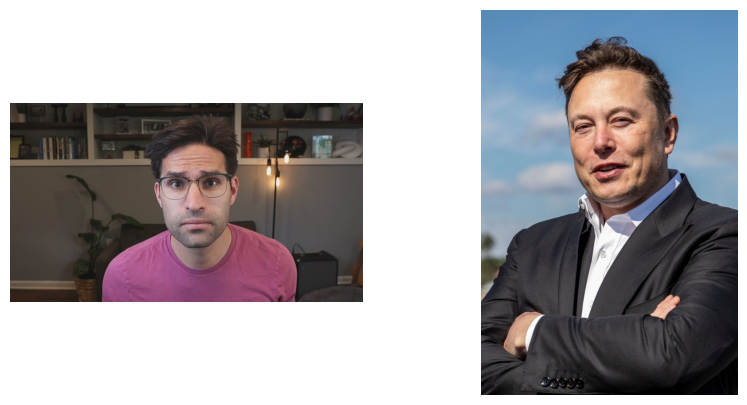

/home/robmulla/anaconda3/envs/insight/lib/python3.9/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


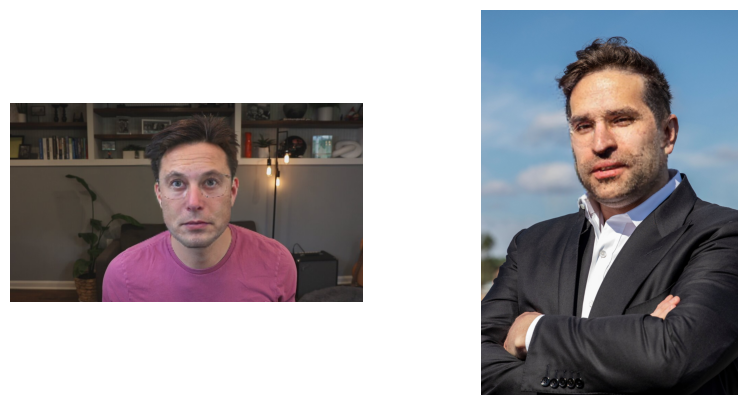

In [12]:
_ = swap_n_show('/home/robmulla/Desktop/rob.jpg', '/home/robmulla/Desktop/elon.jpeg', app, swapper)

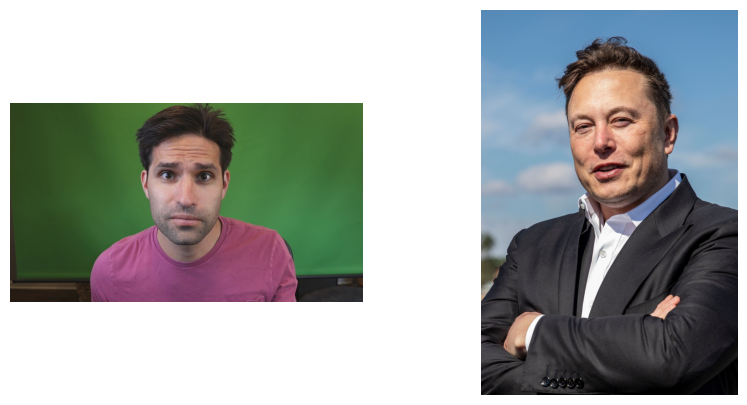

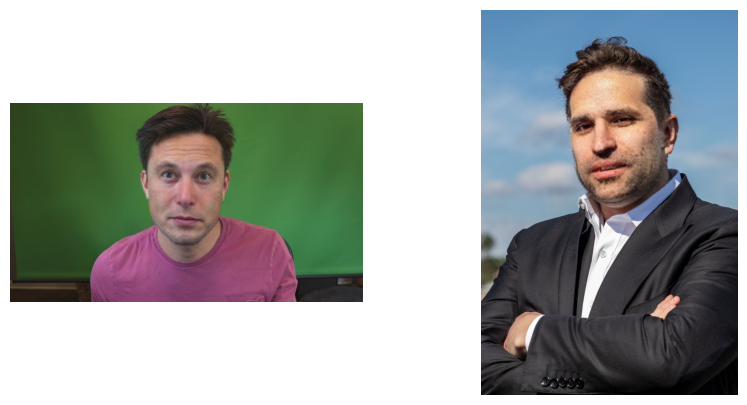

In [14]:
imgout, imgout2 = swap_n_show('/home/robmulla/Desktop/rob2.jpg', '/home/robmulla/Desktop/elon.jpeg', app, swapper)

In [24]:
cv2.imread('/home/robmulla/Desktop/rob2.jpg').shape

(576, 1024, 3)

In [21]:
imgout.shape

(576, 1024, 3)

In [25]:

cv2.imwrite('rob-elon.jpg', imgout)

True